<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/9_DecisionTree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor
from sklearn.model_selection import train_test_split

#data pre-processing
from sklearn import preprocessing

#Decision tree visualization
from sklearn import tree

#module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

#Decision tree visualization
from matplotlib import pyplot as plt

#table
from tabulate import tabulate

In [7]:
!pip install six

Loading data

In [8]:
# # Mount Google Drive (if not already mounted)
# from google.colab import drive
# drive.mount('/content/drive')

### Loading the Data

In [9]:
cars_df = pd.read_csv("CarPrice.csv")
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
#checking the data to see how many rows and columns there are and if there are any empty cells

cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
cars_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Factors that determine the price of a car are:

* 'CarName', 'doornumber', 'carbody', 'drivewheel', 'wheelbase', 'curbweight', 'enginetype','cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'

* 'carbody', 'drivewheel', 'wheelbase', 'enginetype','cylindernumber', 'enginesize', 'horsepower', 'peakrpm'

In [12]:
#converting columns with strings to integer values
labels = preprocessing.LabelEncoder()

cars_df['CarName'] = labels.fit_transform(cars_df['CarName'])
cars_df['carbody'] = labels.fit_transform(cars_df['carbody'])
cars_df['drivewheel'] = labels.fit_transform(cars_df['drivewheel'])
cars_df['cylindernumber'] = labels.fit_transform(cars_df['cylindernumber'])
cars_df['enginetype'] = labels.fit_transform(cars_df['enginetype'])
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,gas,std,two,0,2,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,gas,std,two,0,2,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,gas,std,two,2,2,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,gas,std,four,3,1,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,gas,std,four,3,0,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Defining the features (x) and target (y)

In [13]:
#Defining the features (X) and target (Y)

car_features = ['carbody', 'drivewheel', 'wheelbase', 'enginetype','cylindernumber', 'enginesize', 'horsepower', 'peakrpm']
x = cars_df[car_features]
y = cars_df['price']

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carbody         205 non-null    int64  
 1   drivewheel      205 non-null    int64  
 2   wheelbase       205 non-null    float64
 3   enginetype      205 non-null    int64  
 4   cylindernumber  205 non-null    int64  
 5   enginesize      205 non-null    int64  
 6   horsepower      205 non-null    int64  
 7   peakrpm         205 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 12.9 KB


In [15]:
x.horsepower

,horsepower
0,111
1,111
2,154
3,102
4,115
...,...
200,114
201,160
202,134
203,106


### Splitting the data into training and test datasets

In [16]:
#splitting data into 80% for training and 20% for testing.

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2, random_state=3)

#Popular integer random seeds are 0 and 42. Integer values must be in the range [0, 2**32 - 1].

In [17]:
#printing out the lengths of x_train, x_test, y_train, y_test
len(x_train), len(x_test), len(y_train), len(y_test)

(164, 41, 164, 41)

### Building the Regression Tree Model using DecisionTreeRegressor

In [18]:
dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

### Predicting car prices based on the trained model

In [19]:
y_predicted = dtree.predict(x_test)

In [20]:
y_predicted

array([ 9980.  ,  8345.  ,  6101.75,  9538.  ,  7295.  , 25552.  ,
       10898.  ,  8778.  ,  7609.  , 31400.5 ,  6029.  ,  8013.  ,
        7609.  , 18399.  , 35550.  , 10345.  ,  7295.  ,  7895.  ,
        7295.  ,  8345.  , 21105.  , 18399.  ,  6529.  , 15250.  ,
       10045.  , 11900.  , 21105.  ,  9980.  , 21105.  , 18399.  ,
        5995.  , 18920.  , 12764.  , 45400.  , 12764.  ,  7995.  ,
        8845.  , 31400.5 , 13840.  , 10198.  ,  7045.  ])

In [21]:
y_test

,price
189,11595.0
183,7975.0
118,5572.0
165,9298.0
160,7738.0
70,31600.0
173,8948.0
154,7898.0
25,6692.0
71,34184.0


In [22]:
#printing the predicted prices alongside the actual prices

print(np.concatenate((y_predicted.reshape(len(y_predicted),1), y_test.values.reshape(len(y_test),1)),1))

[[ 9980.   11595.  ]
 [ 8345.    7975.  ]
 [ 6101.75  5572.  ]
 [ 9538.    9298.  ]
 [ 7295.    7738.  ]
 [25552.   31600.  ]
 [10898.    8948.  ]
 [ 8778.    7898.  ]
 [ 7609.    6692.  ]
 [31400.5  34184.  ]
 [ 6029.    6189.  ]
 [ 8013.    7463.  ]
 [ 7609.    6692.  ]
 [18399.   14399.  ]
 [35550.   32250.  ]
 [10345.    9995.  ]
 [ 7295.    6938.  ]
 [ 7895.    9095.  ]
 [ 7295.    9258.  ]
 [ 8345.    7126.  ]
 [21105.   21485.  ]
 [18399.   13499.  ]
 [ 6529.    7129.  ]
 [15250.   13950.  ]
 [10045.   10595.  ]
 [11900.   16630.  ]
 [21105.   24565.  ]
 [ 9980.   11048.  ]
 [21105.   20970.  ]
 [18399.   13499.  ]
 [ 5995.    6095.  ]
 [18920.   17710.  ]
 [12764.   22018.  ]
 [45400.   40960.  ]
 [12764.   15645.  ]
 [ 7995.    7775.  ]
 [ 8845.   10295.  ]
 [31400.5  35056.  ]
 [13840.   17450.  ]
 [10198.    9295.  ]
 [ 7045.    7609.  ]]


### Visualizing the decision tree

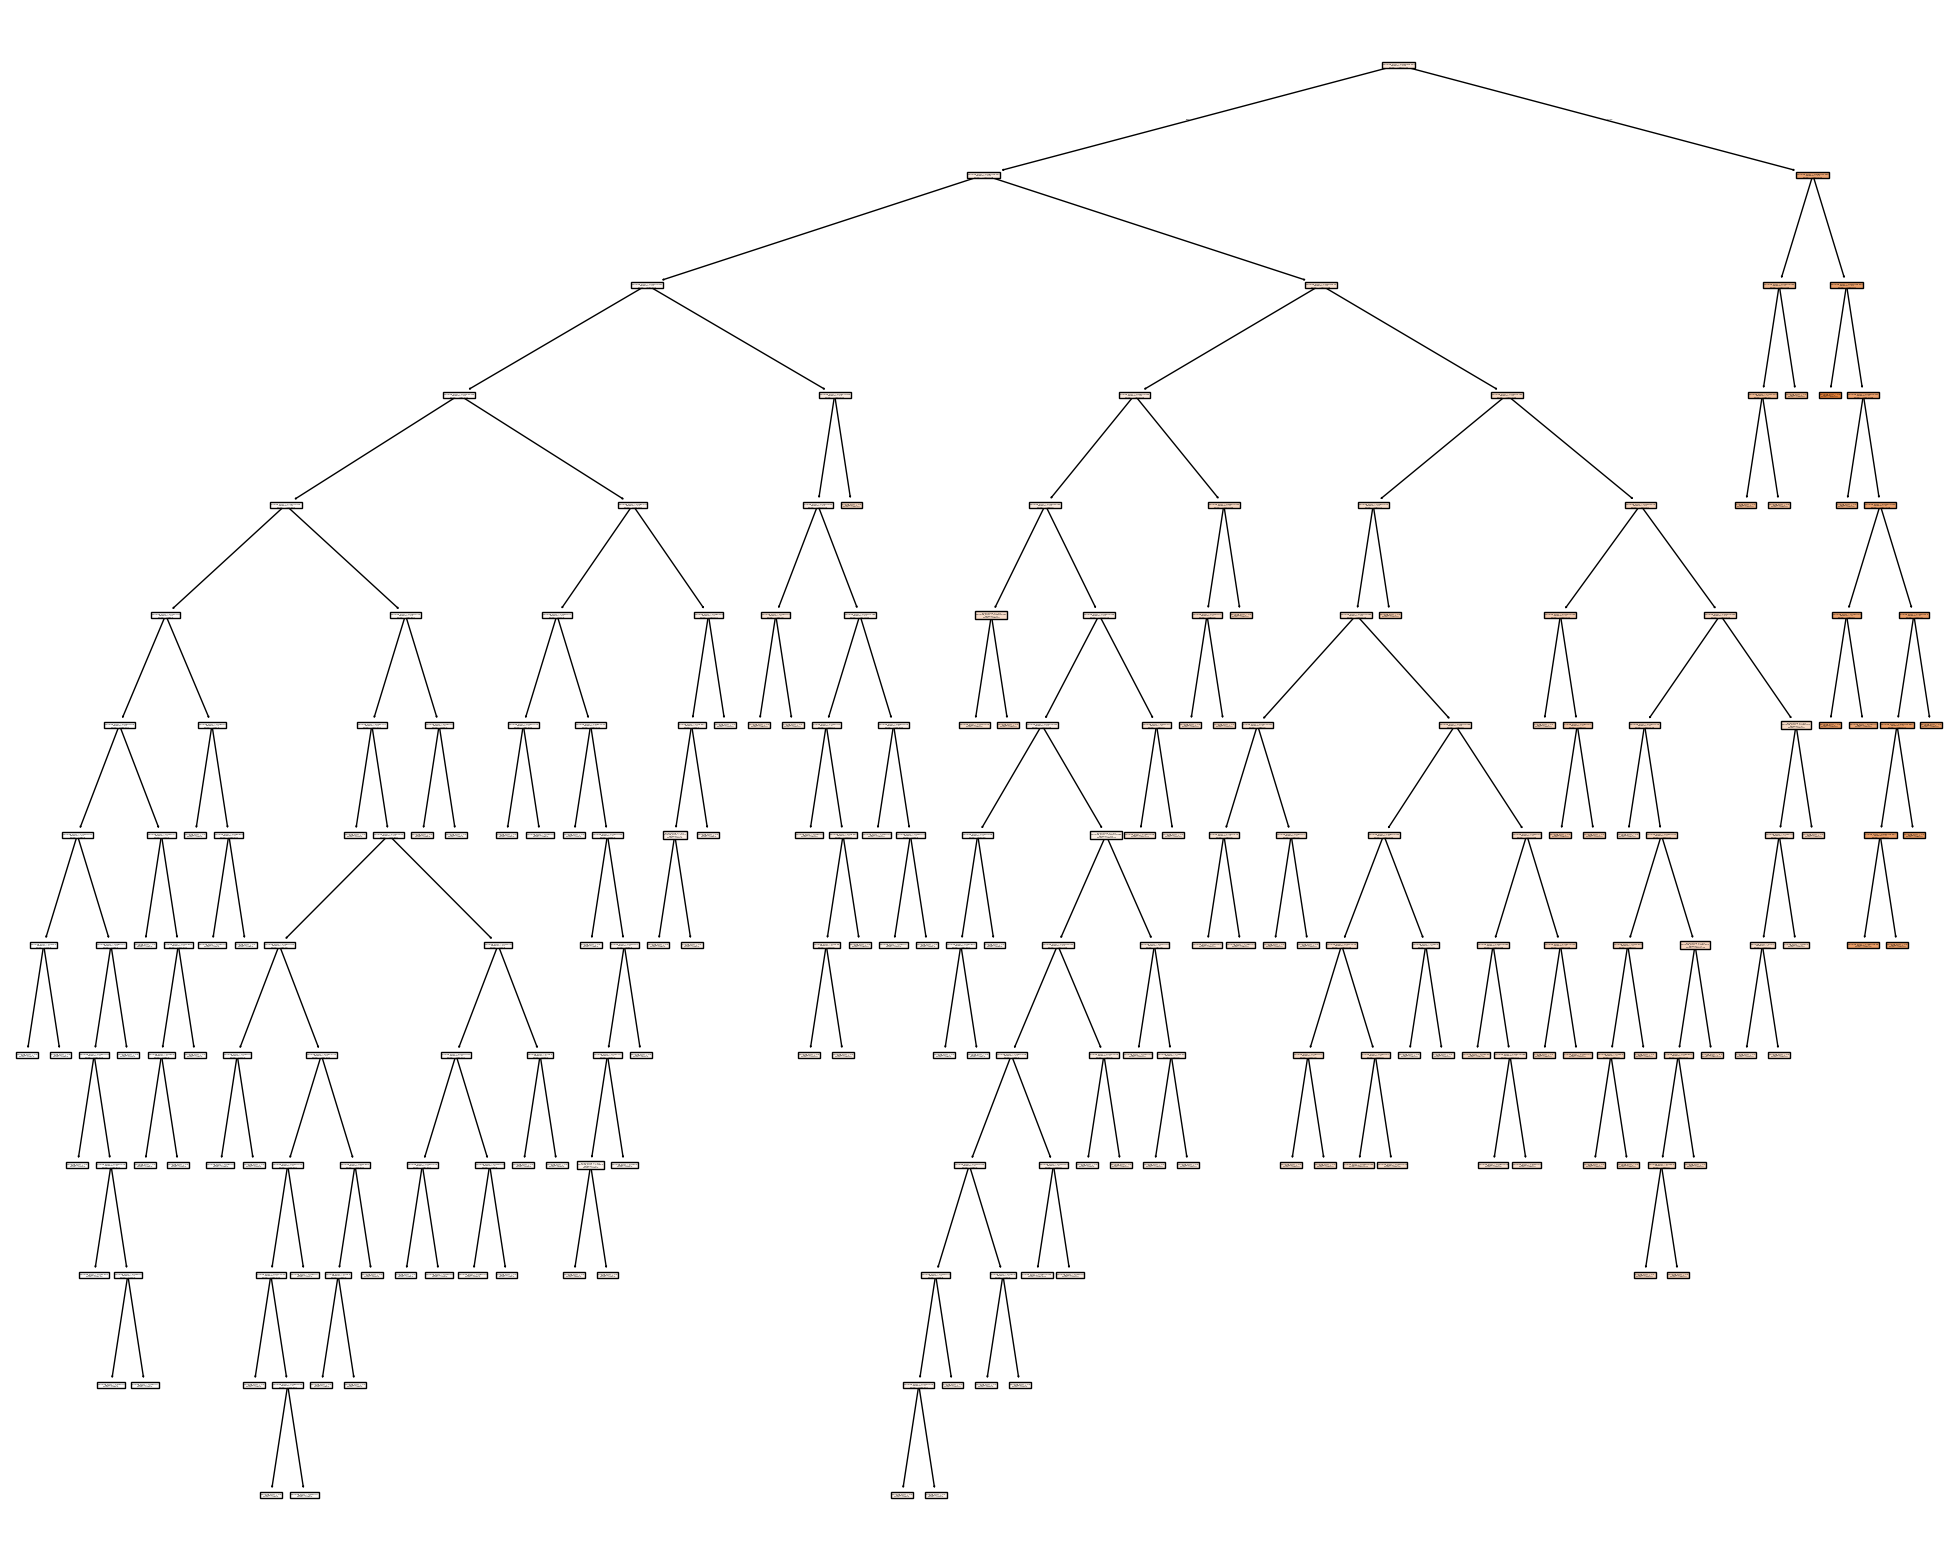

In [23]:
fig_Tree = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree,
                   feature_names=car_features,
                   filled=True)

#### Saving the decion tree figure as a PNG

In [24]:
fig_Tree.savefig("decision_tree.png")

### Measuring the accuracy of the trained decision tree regressor model

In [25]:
#Table
#create data
data = [["r2_score", r2_score(y_test, y_predicted)],
        ["mean_squared_error", mean_squared_error(y_test, y_predicted)],
        ["mean_absolute_percentage_error", mean_absolute_percentage_error(y_test, y_predicted)],
        ["score", dtree.score(x_test, y_predicted)]]

#define header names
col_names = [" ", "Trained Model"]

#display table
print(tabulate(data, headers=col_names))

                                  Trained Model
------------------------------  ---------------
r2_score                            0.905843
mean_squared_error                  7.77892e+06
mean_absolute_percentage_error      0.128577
score                               1


### Improving the Decision Tree Classifier's Accuracy by Tuning the Hyper-Parameters


*   Applying the GridSearchCV class to find the best hyperparameters and apply cross-validation.



### Note:

1. In the training model, we use default values, i.e.,
        criterion=”squared_error”,
        splitter="best",
        max_depth=None,
        max_features=None.
2. Now we are going to consider all the other available options, and pick the one that gives an optimal model.

3. Available options for selected parameters that are of interest to us, for the DecisionTreeRegressor are:
    
    * criterion{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
    * max_depth: int, default=None
    * max_features: int, float or {“auto”, “sqrt”, “log2”}, default=None
    * splitter{“best”, “random”}, default=”best”

In [26]:
# Creating a dictionary of parameters to use in GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth':  [None, 2, 4, 6, 8, 10, 12, 14],
    'max_features': [None, 'auto', 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

dtree = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

dtree.fit(x_train, y_train)
print(dtree.best_params_)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
{'criterion': 'squared_error', 'max_depth': 6, 'max_features': 0.8, 'splitter': 'best'}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
320 fits failed out of a total of 2560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
139 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

#### Recreating and evaluating our model and checking the accuracy score

In [27]:
dtree_optimal = DecisionTreeRegressor(max_depth=6, criterion='friedman_mse', max_features=None, splitter='best', random_state=0)
dtree_optimal.fit(x_train, y_train)
y_predicted_optimal = dtree_optimal.predict(x_test)

In [28]:
#printing the optimal predicted prices alongside the actual prices

print(np.concatenate((y_predicted_optimal.reshape(len(y_predicted_optimal),1), y_test.values.reshape(len(y_test),1)),1))

[[ 9945.         11595.        ]
 [ 8350.14285714  7975.        ]
 [ 6165.125       5572.        ]
 [10100.77272727  9298.        ]
 [ 7370.03703704  7738.        ]
 [25552.         31600.        ]
 [10725.4         8948.        ]
 [ 7370.03703704  7898.        ]
 [ 7121.          6692.        ]
 [31400.5        34184.        ]
 [ 6165.125       6189.        ]
 [ 8350.14285714  7463.        ]
 [ 7121.          6692.        ]
 [16479.         14399.        ]
 [35550.         32250.        ]
 [10100.77272727  9995.        ]
 [ 7370.03703704  6938.        ]
 [ 8350.14285714  9095.        ]
 [ 7370.03703704  9258.        ]
 [ 8350.14285714  7126.        ]
 [22490.         21485.        ]
 [16479.         13499.        ]
 [ 6165.125       7129.        ]
 [13852.5        13950.        ]
 [ 9445.33333333 10595.        ]
 [15900.         16630.        ]
 [22490.         24565.        ]
 [ 9945.         11048.        ]
 [22490.         20970.        ]
 [16479.         13499.        ]
 [ 6165.12

In [ ]:
#plotting the decision tree with plot_tree
fig_clsTree = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree_optimal,
                   feature_names=car_features,
                   filled=True)

#filled=True, the method uses color to indicate the majority of the class.

#### Saving the decion tree figure as a PNG

In [ ]:
fig_clsTree.savefig("decision_tree_optimal.png")

### How to measure accuracy for DecisionTreeRegressor()

* We cannot use confusion matrix, accuracy_score or classification report because you get an error saying: "Classification metrics can't handle a mix of multiclass and continuous targets".

Evaluating predictive capability of the trained regression model:

1. R² score, the coefficient of determination
It represents the proportion of variance (of y) that has been explained by the independent variables in the model.
It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.
Best possible score is 1.0 and worst is 0.0.

2. Mean absolute error
Mean Absolute Error(MAE) is the average of all absolute errors. Absolute error is the difference between the measured value and actual value.

3. Mean absolute percentage deviation (MAPD), is the mean or average of the absolute percentage errors of forecasts.
Error is the actual or observed value minus the forecasted value. Percentage errors are summed without regard to sign to compute MAPE.

4. Score
A method on an estimator, usually a predictor, which evaluates its predictions on a given dataset, and returns a single numerical score.
A greater return value should indicate better predictions; accuracy is used for classifiers and R^2 for regressors by default.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

#trained model
#r2_score(y_test, y_predicted), mean_squared_error(y_test, y_predicted)

#optimal model
#r2_score(y_test, y_predicted_optimal), mean_squared_error(y_test, y_predicted_optimal)

#mean absolute percentage deviation (MAPD), is an evaluation metric for regression problems. The idea of this metric is to be sensitive to relative errors.

#mean_absolute_percentage_error(y_test, y_predicted)

#mean_absolute_percentage_error(y_test, y_predicted_optimal)

#score
#dtree.score(x_test, y_predicted)
#dtree.score(x_test, y_predicted_optimal)

### Comparing the results of the two models

In [ ]:
#Table
#create data
data = [["r2_score", r2_score(y_test, y_predicted), r2_score(y_test, y_predicted_optimal)],
        ["mean_squared_error", mean_squared_error(y_test, y_predicted), mean_squared_error(y_test, y_predicted_optimal)],
        ["mean_absolute_percentage_error", mean_absolute_percentage_error(y_test, y_predicted), mean_absolute_percentage_error(y_test, y_predicted_optimal)],
        ["score", dtree.score(x_test, y_predicted), dtree.score(x_test, y_predicted_optimal)]]

#define header names
col_names = [" ", "Trained Model", "Optimal Model"]

#display table
print(tabulate(data, headers=col_names))

### Conclusion:
The accuracy using the optimal hyper-parameters from GridSearchCV improve the the coefficient of determination r2 from 0.89 to 0.91, reduce the mean_squared_error and mean absolute error from 0.13 to 0.11.

In [ ]:
#links
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
#https://scikit-learn.org/stable/modules/model_evaluation.html
#https://towardsdatascience.com/decisiontreeregressor-stop-using-for-future-projections-e27104537f6a
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
#https://scikit-learn.org/stable/modules/model_evaluation.html